In [27]:
 # imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [28]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [29]:
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token("pk.eyJ1IjoiYW1pcmFhbGktMjMiLCJhIjoiY2wxanBlaXF1MjB2MjNxcWlxcW1idHZlNCJ9.i5IeFhIdtSW5nHCAhYd8Iw")

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 7


In [30]:
 # Import the CSVs to Pandas DataFrames
file_path = Path("Resources/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Resources/toronto_neighbourhoods_coordinates.csv")
nl = pd.read_csv(file_path)

In [31]:
file_path = Path("Resources/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
dwelling_by_year= to_data.groupby("year").sum()
dwelling_to_graph= dwelling_by_year.drop(columns=["average_house_value", "shelter_costs_owned","shelter_costs_rented"])
shelter_costs=to_data.groupby("year").mean().iloc[: , -2:]
average_owned_dwellings = shelter_costs[["shelter_costs_owned"]].copy()
average_rented_dwellings = shelter_costs[["shelter_costs_rented"]].copy()

In [32]:
def neighbourhood_map():
    """Neighbourhood Map"""
   
     # Load neighbourhoods coordinates data
    file_path = Path("Resources/toronto_neighbourhoods_coordinates.csv")
    nl = pd.read_csv(file_path)
    nl=nl.set_index(['neighbourhood'])
    totalmean=to_data.groupby("neighbourhood").mean()
    combined=pd.merge(totalmean,nl, how='inner', left_on=totalmean.index, right_on= nl.index)
    combined=combined.set_index(['key_0'])
    combined.index.rename("Neighbourhood",inplace=True)
        # Create plots
    plot = px.scatter_mapbox(
    combined,
    lat="lat",
    lon="lon",
    size= "average_house_value", 
    color= "average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Neighbourhood",
    zoom=3,
    width=1000,
    )

    return plot



In [33]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    new_bar_chart = data.plot.bar(
   
    title=title, xlabel=xlabel, rot=90, ylabel=ylabel, color=color)
    
    return new_bar_chart 

In [34]:
def create_line_chart():
    """
    Create a line chart based in the data argument.
    """
    
    
    # Calculate the average monthly shelter costs for owned and rented dwellings
    shelter_costs=to_data.groupby("year").mean().iloc[: , -2:]
    average_owned_dwellings = shelter_costs[["shelter_costs_owned"]].copy()

    return plt.plot(average_owned_dwellings, color="blue")
    plt.title("Avg Monthly Shelter Costs for Owned Dwellings in Toronto")
    plt.xlabel("Year") 
    plt.ylabel("Avg monthly shelter costs")
    plt.show()

In [35]:
def create_line_chart2():
    """
    Create a line chart based in the data argument.
    """
    
    
    # Calculate the average monthly shelter costs for owned and rented dwellings
    shelter_costs=to_data.groupby("year").mean().iloc[: , -2:]
    average_rented_dwellings = shelter_costs[["shelter_costs_rented"]].copy()

    return plt.plot(average_rented_dwellings, color="gold")
    plt.title("Avg Monthly Shelter Costs for Rented Dwellings in Toronto")
    plt.xlabel("Year") 
    plt.ylabel("Avg monthly shelter costs")
    plt.show()

In [36]:
def average_house_value():
    """Average house values per year."""
    
    average_house_value= to_data[["average_house_value"]].groupby("year").mean()
    avghvplot=plt.plot(average_house_value, color="green")
        
    plt.title("Average House Value in Toronto")
    plt.xlabel("Year") 
    plt.ylabel("Avg House Value")
    plt.show()
    
    return avghvplot

In [37]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    newavg=to_data[['neighbourhood','average_house_value']]
    avgbn=newavg.hvplot.line(xlabel="Year", ylabel="average_house_value",groupby="neighbourhood", dynspread=True).opts(framewise=True) 
    plt.show()
    return avgbn    

In [38]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    
    dwellingtypes=["single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house"]

    dwelling=to_data.drop(columns=["average_house_value", "shelter_costs_owned","shelter_costs_rented"])
    dwellplot=dwelling.hvplot.bar(xlabel="Year", ylabel="Dwelling Units", groupby="neighbourhood", rot=90)

    
    return dwellplot

In [39]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    meanavg=to_data[['neighbourhood','average_house_value']].groupby("neighbourhood").mean()

    return meanavg

In [40]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    meanavg=to_data[['neighbourhood','average_house_value']].groupby("neighbourhood").mean()
    newmeanavg=meanavg.sort_values(by="average_house_value",ascending=False)
    top10=newmeanavg.head(10)
    top10plot=top10.hvplot.bar(xlabel="Neighbourhood", ylabel="Mean House Value",rot=90)
    
    return top10plot

In [41]:
title = pn.pane.Markdown('# Real Estate Analysis', width=800)

In [42]:
welcome=pn.pane.Markdown('# Toronto Rental Analysis')

In [43]:
Neighbourhood_Analysis=pn.Column(neighbourhood_map())

In [44]:
Neighbourhood_Analysis1=pn.Column(average_value_by_neighbourhood())

In [45]:
Top10Expensive=pn.Column(top_most_expensive_neighbourhoods())

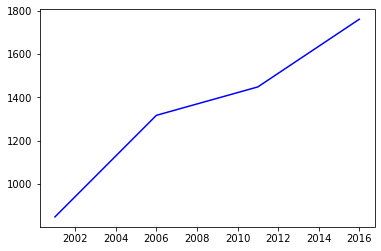

In [46]:
Dwelling_Analysis1= pn.Column(create_line_chart())

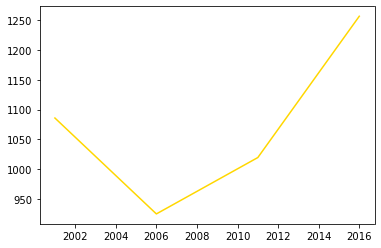

In [47]:
Dwelling_Analysis2=pn.Column(create_line_chart2())

In [48]:
Dwelling_Analysis3=pn.Column(number_dwelling_types())

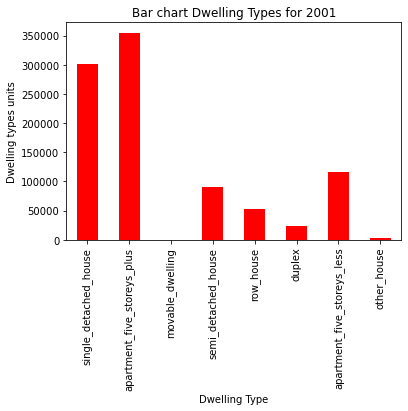

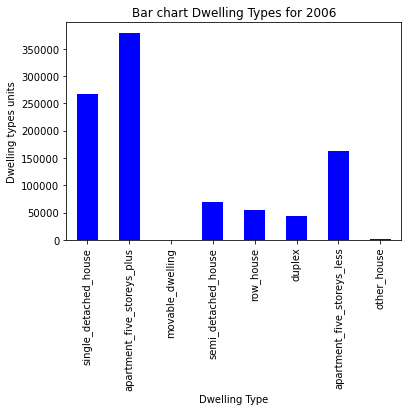

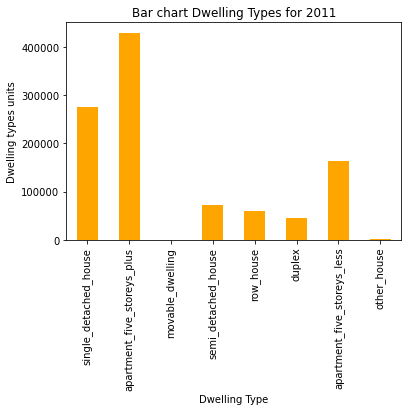

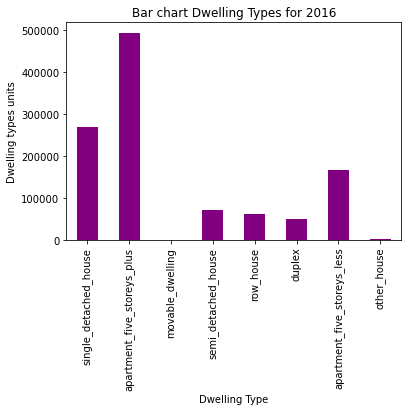

In [49]:

# Bar chart for 2001
Barchart2001=pn.Column(create_bar_chart(dwelling_to_graph.loc[2001, :], "Bar chart Dwelling Types for 2001","Dwelling Type","Dwelling types units", "Red"))
plt.show()
# Bar chart for 2006
Barchart2006=pn.Column(create_bar_chart(dwelling_to_graph.loc[2006, :], "Bar chart Dwelling Types for 2006","Dwelling Type","Dwelling types units", "Blue"))
plt.show()
# Bar chart for 2011
Barchart2011=pn.Column(create_bar_chart(dwelling_to_graph.loc[2011, :], "Bar chart Dwelling Types for 2011","Dwelling Type","Dwelling types units", "Orange"))
plt.show()
# Bar chart for 2016
Barchart2016=pn.Column(create_bar_chart(dwelling_to_graph.loc[2016, :], "Bar chart Dwelling Types for 2016","Dwelling Type","Dwelling types units", "Purple"))
plt.show()

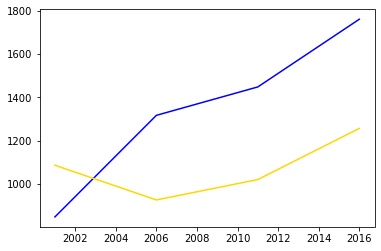

In [50]:
# Create tabs

tabs = pn.Tabs(("Welcome", pn.Column(welcome)),
("Neighbourhood Study", Neighbourhood_Analysis),
("Average Value per Neighbourhood",Neighbourhood_Analysis1),
("Top 10 Most Expensive Neighbourhoods",Top10Expensive),
("Average Monthly Shelter Costs Owned", pn.Column(create_line_chart())),
("Average Monthly Shelter Costs Rented",pn.Column(create_line_chart2())),
("Number of Dwelling Types",Dwelling_Analysis3),
("Dwelling Types Bar Chart 2001", Barchart2001),
("Dwelling Types Bar Chart 2006",Barchart2006),
("Dwelling Types Bar Chart 2011",Barchart2011),
("Dwelling Types Bar Chart 2016",Barchart2016))

In [51]:
dashboard=pn.Column(pn.Row(title),tabs,width=900)
dashboard.servable()

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
        [1] Column
            [0] Plotly(Figure)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
        [3] Column
            [0] HoloViews(Bars)
        [4] Column
            [0] Str(list)
        [5] Column
            [0] Str(list)
        [6] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
        [7] Column
            [0] Str(AxesSubplot)
        [8] Column
            [0] Str(AxesSubplot)
        [9] Column
            [0] Str(AxesSubplot)
        [10] Column
            [0] Str(AxesSubplot)